## Problem
Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.

After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

**You are asked to:**

- Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better
- Explain why that might be happening. Are the localized translations really worse?
- If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.


## Data
**test_table**
- user_id : the id of the user. Unique by user. Can be joined to user id in the other table. For each user, we just check whether conversion happens the first time they land on the site since the test started.
- date : when they came to the site for the first time since the test started
- source : marketing channel: Ads, SEO, Direct . Direct means everything except for ads and SEO. Such as directly typing site URL on the browser, downloading the app w/o coming from SEO or Ads, referral friend, etc.
- device : device used by the user. It can be mobile or web
- browser_language : in browser or app settings, the language chosen by the user. It can be EN, ES, Other (Other means any language except for English and Spanish) ads_channel : if marketing channel is ads, this is the site where the ad was displayed. It can be: Google, Facebook, Bing, Yahoo ,Other. If the user didn't come via an ad, this field is NA
- browser : user browser. It can be: IE, Chrome, Android_App, FireFox, Iphone_App, Safari, Opera
- conversion : whether the user converted (1) or not (0). This is our label. A test is considered successful if it increases the proportion of users who convert.
- test : users are randomly split into test (1) and control (0). Test users see the new translation and control the old one. For Spain-based users, this is obviously always 0 since there is no change there.

**user_table**
- user_id : the id of the user. It can be joined to user id in the other table sex : user sex: Male or Female
- age : user age (self-reported)
- country : user country based on ip address

# Read Data

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [230]:
from statsmodels.stats.proportion import proportions_ztest

In [231]:
data_test = pd.read_csv('test_table.csv')
data_user = pd.read_csv('user_table.csv')
# data.head()

In [232]:
data_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,12/3/2015,Direct,Web,ES,NaN,IE,1,0
1,497851,12/4/2015,Ads,Web,ES,Google,IE,0,1
2,848402,12/4/2015,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,12/3/2015,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,11/30/2015,Ads,Web,ES,Google,FireFox,0,1


In [233]:
data_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


# Exploratory Data Analysis

In [234]:
data['date'] = pd.to_datetime(data['date'])

In [235]:
[len(data_test.user_id.unique()) , len(data_user.user_id.unique())]

[453321, 452867]

In [236]:
# inner_join
# data = pd.merge(data_test, data_user, on=['user_id'])
# left_join
data = pd.merge(data_test, data_user, how='left', on=['user_id'])
data.shape

(453321, 12)

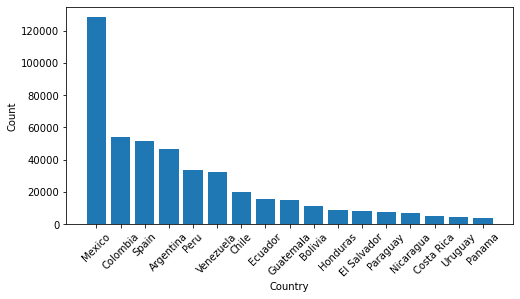

In [237]:
plt.figure(figsize=(8,4))
plt.bar(data.country.value_counts().index, data.country.value_counts())
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

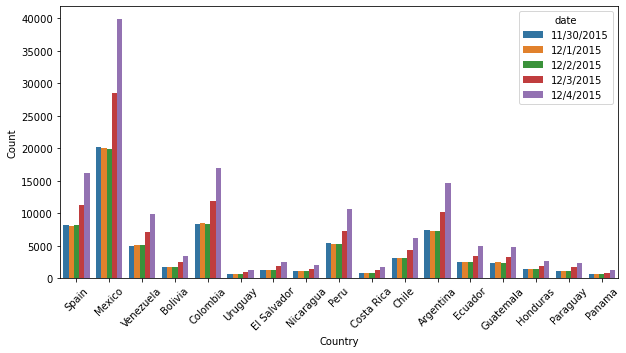

In [238]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', hue='date', hue_order=np.sort(data.date.unique()), data=data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

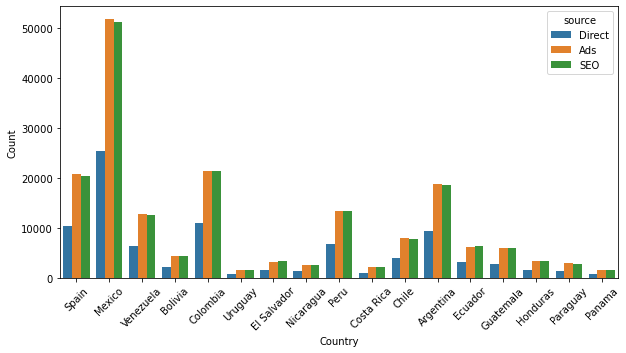

In [239]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', hue='source', data=data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

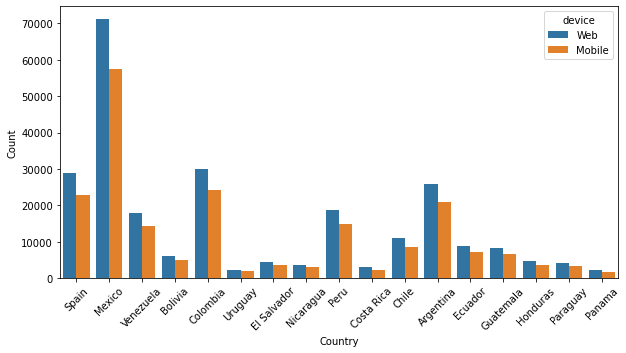

In [240]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', hue='device', data=data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

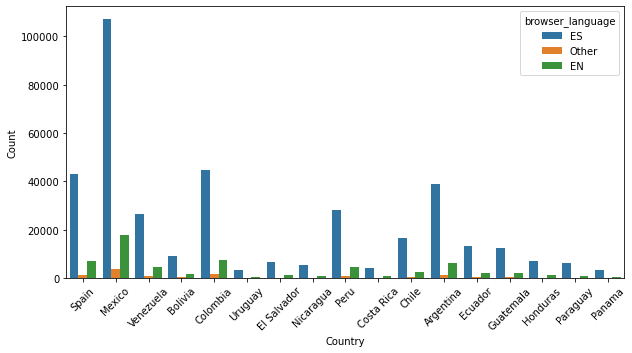

In [241]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', hue='browser_language', data=data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

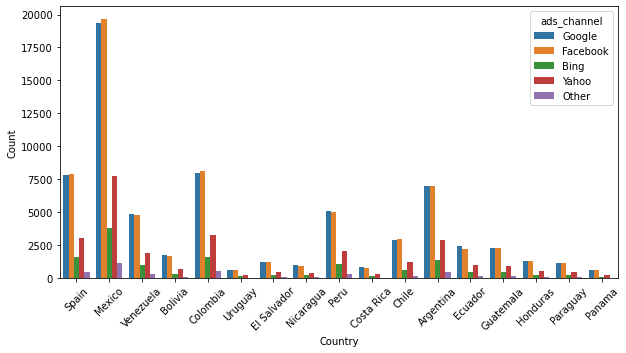

In [242]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', hue='ads_channel', data=data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

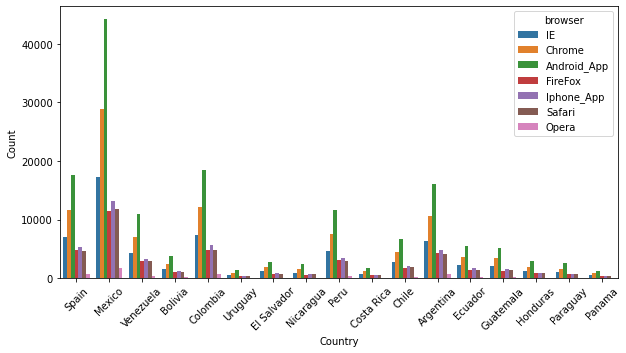

In [243]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', hue='browser', data=data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

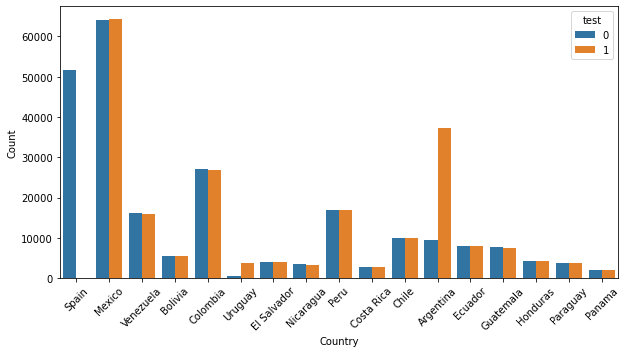

In [244]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', hue='test', data=data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From above graphs, we can have a better sense of the distributions of different features in different countries. Although different values of one feature are not evenly distributed, they have the similar distirbution across the countries. However, ther's exceptions that the `test` splitting is not the same in Argentina compared with other countries, and that there's no 'test' group in Spain, which may have an impact on the hypothesis test. 

## Verify the hypothesis test

In [245]:
sum_0, sum_1 = data.groupby('test').conversion.sum()
sum_0, sum_1

(13096, 9379)

In [246]:
size_0, size_1 = data.groupby('test').size()
size_0, size_1

(237338, 215983)

In [256]:
z_score, p_value = proportions_ztest([sum_0, sum_1], [size_0, size_1], alternative='smaller')
print('P-value is ', p_value)

(18.20833653382862, 1.0)

In [258]:
z_score, p_value = proportions_ztest([sum_0, sum_1], [size_0, size_1], alternative='larger')
print('P-value is ', p_value)

P-value is  2.2160478469613603e-74


If we retest the proportion z-test in the same way like the data scientist, we get the same result that the localized translation was doing worse. 

# Improve the test

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
conversion_rate = data.groupby('country').conversion.mean().sort_values(ascending=False)
control_conversion = data.loc[data.test==0].groupby('country').conversion.mean()
test_conversion = data.loc[data.test==1].groupby('country').conversion.mean()

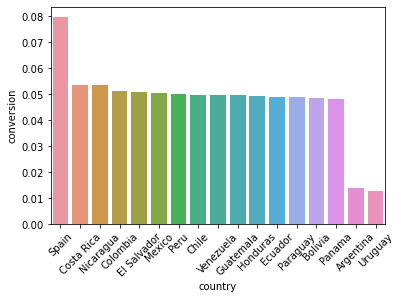

In [93]:
sns.barplot(x=conversion_rate.index, y=conversion_rate)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='country', ylabel='conversion'>

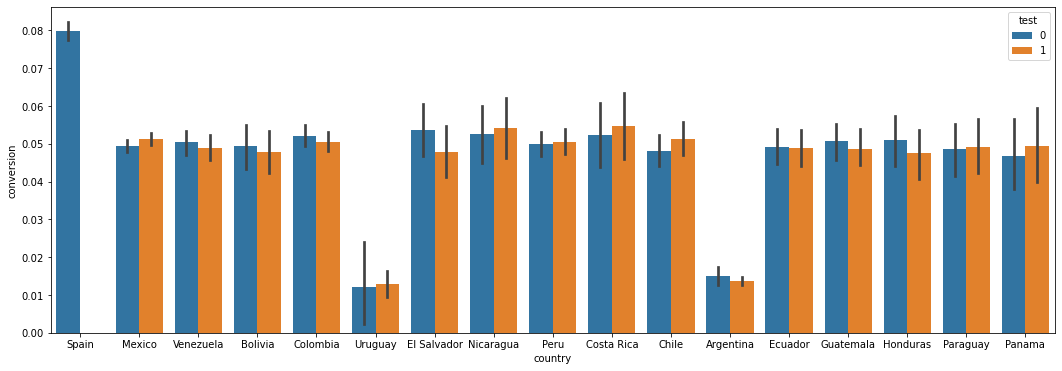

In [274]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', y='conversion', hue='test', data=data)

Now we know that there's no 'test' group in Spain, but Spain has the highest conversion rate in our sample, which bring a bias. Next let's do a series of z-tests in each country, excluding Spain.

## Z-test among different countries

In [96]:
data_new = data.loc[data.country != 'Spain']

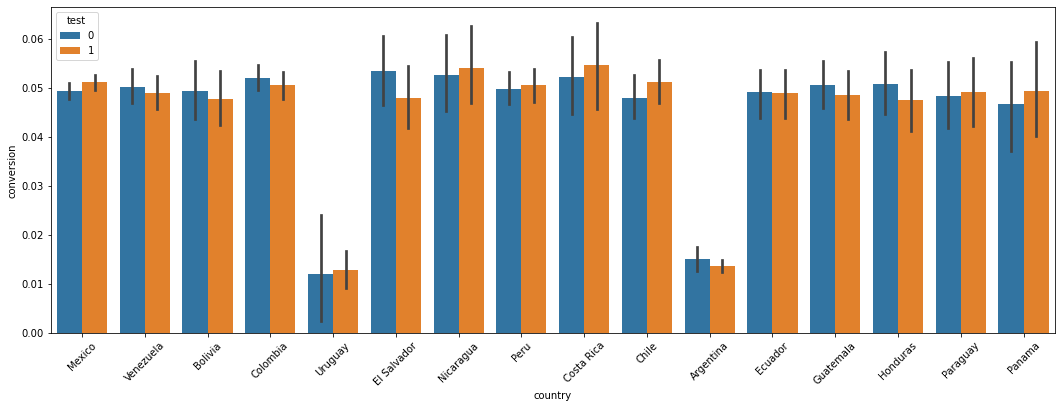

In [260]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', y='conversion', hue='test', data=data_new)
plt.xticks(rotation=45)
plt.show()

In [270]:
country_conversion_control = data_new[data_new.test==0].groupby('country').conversion
country_conversion_test = data_new[data_new.test==1].groupby('country').conversion
country_conversion = pd.DataFrame({'country':country_conversion_control.groups.keys(),
    'count_control':country_conversion_control.sum(), 
    'nobs_control':country_conversion_control.size(),
    'count_test':country_conversion_test.sum(),
    'nbos_test':country_conversion_test.size()}).set_index('country')
country_conversion

,count_control,nobs_control,count_test,nbos_test
country,,,,
Argentina,141,9356,513,37377
Bolivia,274,5550,267,5574
Chile,474,9853,507,9884
Colombia,1411,27088,1364,26972
Costa Rica,139,2660,145,2649
Ecuador,395,8036,385,7859
El Salvador,220,4108,195,4067
Guatemala,386,7622,365,7503
Honduras,222,4361,200,4207


In [271]:
def ztest(row):
    return proportions_ztest(count=row[[0,2]], nobs=row[[1,3]], value=0, alternative='two-sided')[1]

In [272]:
country_conversion.insert(country_conversion.shape[1], 'pvalue', country_conversion.apply(ztest, axis=1))

In [273]:
country_conversion

,count_control,nobs_control,count_test,nbos_test,pvalue
country,,,,,
Argentina,141,9356,513,37377,0.321756
Bolivia,274,5550,267,5574,0.718847
Chile,474,9853,507,9884,0.302847
Colombia,1411,27088,1364,26972,0.423724
Costa Rica,139,2660,145,2649,0.687796
Ecuador,395,8036,385,7859,0.961509
El Salvador,220,4108,195,4067,0.248198
Guatemala,386,7622,365,7503,0.572135
Honduras,222,4361,200,4207,0.471663


Now, we get no significant p-value. So, the localized translation do not improve the conversion rate significantly, but it does not decrease the conversion rate significnatly neither. 

Next, let's adjust the sample of Argentina to make it have same samples in 'test' group and 'control' group. 

In [281]:
Arg_test_0 = data_new[(data_new.country=='Argentina') & (data_new.test==0)]

In [314]:
Arg_test_1 = data_new[(data_new.country=='Argentina') & (data_new.test==1)].sample(n=Arg_test_0.shape[0], random_state=1)
Arg_test_1.shape

(9356, 12)

In [315]:
[Arg_test_1.loc[:, 'conversion'].mean(), data.loc[data.country=='Argentina', 'conversion'].mean()]

[0.013360410431808465, 0.013994393683264503]

In [330]:
sum_0 = Arg_test_0.conversion.sum()
sum_1 = Arg_test_1.conversion.sum()
size_0 = Arg_test_0.shape[0]
size_1 = Arg_test_1.shape[0]
sum_0, sum_1, size_0, size_1

(141, 125, 9356, 9356)

In [333]:
z_stat, p_value = proportions_ztest([sum_0, sum_1], [size_0, size_1], 0, 'two-sided')
print('p-value is ', p_value)

p-value is  0.32311786200917236


The p-value is similar. 

Above all, the localized translation do not have a significant improvement to the conversion rate, which is not as expected. 